# NHANES, Biomarkers, and Physical Activity

## A. Introduction

This is an introduction

## B. Cleaning

This is the initial cleaning of the data to make it usable.

In [151]:
# import statements
import os
import math
import scipy
import pandas as pd
import numpy as np
import seaborn  as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn import tree
from imblearn.over_sampling import SMOTE
from scipy.stats import randint
from scipy.stats import loguniform

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn import model_selection as ms
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFE
from catboost import CatBoostClassifier
import matplotlib.gridspec as gridspec
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
f1_score, roc_auc_score, roc_curve, precision_score, recall_score
import xgboost as xgb
from xgboost import plot_importance
from scipy.cluster.hierarchy import linkage, dendrogram

In [152]:
absolute_path = r'C:\Users\jckei\Documents\SeiverdesProject\NHANESPA_Analysis\data\merged_result.csv'# replace with the absolute path of your merged_result.csv file
data = pd.read_csv(absolute_path)
data.describe()

,SEQN,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,...,PAD680,WTPH2YR_y,LBXVIDMS,LBDVIDLC,LBXVD2MS,LBDVD2LC,LBXVD3MS,LBDVD3LC,LBXVE3MS,LBDVE3LC
count,1.193400e+04,8860.000000,8860.000000,8860.000000,8860.000000,8860.000000,8860.000000,8860.0,8860.000000,8860.000000,...,8154.000000,8727.000000,8727.000000,8727.0,8727.000000,8727.000000,8727.000000,8727.0,8727.000000,8727.000000
mean,1.363326e+05,1.132280,69.704997,0.112190,4.321196,0.002032,0.331298,0.0,153.159029,0.034989,...,446.149742,37080.516214,64.855235,0.0,3.577189,0.671479,61.216821,0.0,4.045147,0.008021
std,3.663889e+03,0.503848,31.165417,0.570811,18.864739,0.045030,3.720896,0.0,37.081357,0.305563,...,916.764092,31954.395852,43.769865,0.0,12.494690,0.469702,42.627276,0.0,3.933570,0.089206
min,3.687825e-40,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.333602e+05,1.000000,53.300000,0.000000,0.000000,0.000000,0.000000,0.0,152.800000,0.000000,...,180.000000,17131.532726,37.100000,0.0,1.570000,0.000000,31.900000,0.0,1.540000,0.000000
50%,1.363435e+05,1.000000,71.400000,0.000000,0.000000,0.000000,0.000000,0.0,162.800000,0.000000,...,300.000000,29684.975622,65.100000,0.0,1.570000,1.000000,60.900000,0.0,3.230000,0.000000
75%,1.393268e+05,1.000000,88.725000,0.000000,0.000000,0.000000,0.000000,0.0,171.700000,0.000000,...,480.000000,48969.397932,89.900000,0.0,1.570000,1.000000,86.050000,0.0,5.470000,0.000000
max,1.423100e+05,4.000000,248.200000,4.000000,118.800000,1.000000,46.500000,0.0,200.700000,3.000000,...,9999.000000,253478.777645,424.000000,0.0,239.000000,1.000000,422.000000,0.0,62.800000,1.000000


In [153]:
# Removed because of irrelevance
data = data.drop('BMDSTATS', axis=1)

# Removed irrelevant comment data, mostly whether or not the actually data was observed. This will be handled differently later.
data = data.drop('BMIWT', axis=1) 
data = data.drop('BMIRECUM', axis=1)
data = data.drop('BMIHEAD', axis=1)
data = data.drop('BMIHT', axis=1)
data = data.drop('BMILEG', axis=1)
data = data.drop('BMIARML', axis=1)
data = data.drop('BMIARMC', axis=1)
data = data.drop('BMIWAIST', axis=1)
data = data.drop('BMIHIP', axis=1)
data = data.drop('LBDVIDLC', axis=1) # 25-hydroxyvitamin D2 + D3 comment, but irrelevent because all have the same value
data = data.drop('LBDVD2LC', axis=1) # 25-hydroxyvitamin D2 comment code but other methods of dealing with missing data will be used
data = data.drop('LBDVD3LC', axis=1) # 25-hydroxyvitamin D3 comment but all have the same value
data = data.drop('LBDVE3LC', axis=1) # epi-25-hydroxyvitamin D3 comment but other method of dealing with missing data will be used

# Removed irrelevant classification data
data = data.drop('BPAOARM', axis=1) # Left or Right arm for BP measurement
data = data.drop('BPAOCSZ', axis=1) # Cuff size based on ranges, but anthropomorphic measurement already taken
data = data.drop('SDDSRVYR', axis=1) # Data release cylce, but not relavent since it is not cross-sectional
data = data.drop('RIDSTATR', axis=1) # Whether they were intervewed or examined

data.describe()


,SEQN,BMXWT,BMXRECUM,BMXHEAD,BMXHT,BMXBMI,BMDBMIC,BMXLEG,BMXARML,BMXARMC,...,PAD790Q,PAD800,PAD810Q,PAD820,PAD680,WTPH2YR_y,LBXVIDMS,LBXVD2MS,LBXVD3MS,LBXVE3MS
count,1.193400e+04,8860.000000,8860.000000,8860.000000,8860.000000,8860.000000,8860.000000,8860.000000,8860.000000,8860.000000,...,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8727.000000,8727.000000,8727.000000,8727.000000,8727.000000
mean,1.363326e+05,69.704997,4.321196,0.331298,153.159029,26.050395,0.720316,31.567246,33.954673,29.532573,...,60.002330,73.223817,49.120309,44.118960,446.149742,37080.516214,64.855235,3.577189,61.216821,4.045147
std,3.663889e+03,31.165417,18.864739,3.720896,37.081357,9.720207,1.241880,14.816249,8.734262,9.101948,...,740.849258,483.467763,684.644767,409.964184,916.764092,31954.395852,43.769865,12.494690,42.627276,3.933570
min,3.687825e-40,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.333602e+05,53.300000,0.000000,0.000000,152.800000,20.800000,0.000000,33.000000,33.100000,25.600000,...,1.000000,15.000000,0.000000,0.000000,180.000000,17131.532726,37.100000,1.570000,31.900000,1.540000
50%,1.363435e+05,71.400000,0.000000,0.000000,162.800000,25.900000,0.000000,37.100000,36.400000,30.900000,...,2.000000,30.000000,0.000000,0.000000,300.000000,29684.975622,65.100000,1.570000,60.900000,3.230000
75%,1.393268e+05,88.725000,0.000000,0.000000,171.700000,31.300000,2.000000,40.100000,38.900000,35.200000,...,4.000000,60.000000,2.000000,45.000000,480.000000,48969.397932,89.900000,1.570000,86.050000,5.470000
max,1.423100e+05,248.200000,118.800000,46.500000,200.700000,74.800000,4.000000,51.600000,49.200000,63.300000,...,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,253478.777645,424.000000,239.000000,422.000000,62.800000


Now we have removed all of the irrelevant columns. Next, we'll look for respondants missing 10% or more of data.

In [154]:
threshold = len(data.columns) * 0.1

valid_rows = data[data.isnull().sum(axis=1) >= threshold]
valid_rows.describe()

,SEQN,BMXWT,BMXRECUM,BMXHEAD,BMXHT,BMXBMI,BMDBMIC,BMXLEG,BMXARML,BMXARMC,...,PAD790Q,PAD800,PAD810Q,PAD820,PAD680,WTPH2YR_y,LBXVIDMS,LBXVD2MS,LBXVD3MS,LBXVE3MS
count,6.838000e+03,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.00000,3764.000000,3764.000000,...,3058.000000,3058.000000,3058.000000,3058.000000,3058.000000,3631.000000,3631.000000,3631.000000,3631.000000,3631.000000
mean,1.362964e+05,53.810919,10.171573,0.779835,136.803905,22.034485,1.538523,25.20813,30.420962,25.483422,...,94.629496,73.146828,86.105625,30.204382,494.064748,31266.822524,52.758912,2.859992,49.844412,3.341410
std,3.817060e+03,32.561336,27.898016,5.678442,46.964662,10.245931,1.427997,17.78219,9.783839,9.428142,...,932.128044,542.739312,907.721807,363.202559,1134.015840,30950.029439,44.154971,11.889087,42.456932,3.640977
min,3.687825e-40,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.333582e+05,24.600000,0.000000,0.000000,122.550000,16.400000,0.000000,0.00000,25.000000,18.600000,...,0.000000,0.000000,0.000000,0.000000,180.000000,10530.303476,0.000000,0.000000,0.000000,0.000000
50%,1.362625e+05,53.050000,0.000000,0.000000,153.700000,21.300000,2.000000,34.60000,33.600000,26.000000,...,2.000000,30.000000,0.000000,0.000000,300.000000,25378.260537,54.700000,1.570000,51.300000,2.730000
75%,1.392928e+05,76.625000,0.000000,0.000000,166.200000,28.100000,2.000000,38.80000,37.400000,32.200000,...,3.000000,60.000000,1.000000,20.000000,480.000000,43524.962171,79.900000,1.570000,76.650000,4.770000
max,1.423100e+05,192.100000,118.800000,46.500000,197.100000,68.500000,4.000000,51.60000,46.300000,59.200000,...,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,253478.777645,285.000000,239.000000,283.000000,33.900000


In [155]:
data['PAMINW'] = 0

for index, row in data.iterrows():
    if row['PAD790U'] == 'D':
        data.at[index, 'PAMINW'] = (row['PAD790Q'] * 7 * row['PAD800'])
    elif row['PAD790U'] == 'W':
        data.at[index, 'PAMINW'] = (row['PAD790Q'] * row['PAD800'])
    elif row['PAD790U'] == 'M':
        data.at[index, 'PAMINW'] = (row['PAD790Q'] / 4) * row['PAD800']
    elif row['PAD790U'] == 'Y':
        data.at[index, 'PAMINW'] = (row['PAD790Q'] / 52) * row['PAD800']
    else:
        data.at[index, 'PAMINW'] += 0

for index, row in data.iterrows():
    if row['PAD810U'] == 'D':
        data.at[index, 'PAMINW'] += ((row['PAD810Q'] * 2 * 7) * row['PAD820'])
    elif row['PAD810U'] == 'W':
        data.at[index, 'PAMINW'] += ((row['PAD810Q'] * 2) * row['PAD820'])
    elif row['PAD810U'] == 'M':
        data.at[index, 'PAMINW'] += ((row['PAD810Q'] * 2 / 4) * row['PAD820'])
    elif row['PAD810U'] == 'Y':
        data.at[index, 'PAMINW'] += ((row['PAD810Q'] * 2 / 52) * row['PAD820'])
    else:
        data.at[index, 'PAMINW'] += 0


# Print information about the updated DataFrame
print(data['PAMINW'].describe())

C:\Users\jckei\AppData\Local\Temp\ipykernel_37920\3012330255.py:9: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '22.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



count     11934.000000
mean        468.631608
std        8218.049695
min           0.000000
25%           0.000000
50%          30.000000
75%         270.000000
max      706230.000000
Name: PAMINW, dtype: float64


Now that we have quanified the target variable of Physical Activity in Physical Activity Minutes per week in the column PAMIN, we can remove the columns to reduce the data size.

In [156]:
data = data.drop('PAD790U', axis=1) 
data = data.drop('PAD810U', axis=1) 
data = data.drop('PAD790Q', axis=1) 
data = data.drop('PAD810Q', axis=1) 
data = data.drop('PAD800', axis=1) 
data = data.drop('PAD820', axis=1) 
working_data = data.dropna(subset=['PAMINW'])

working_data = working_data[working_data['PAMINW'] != 0]

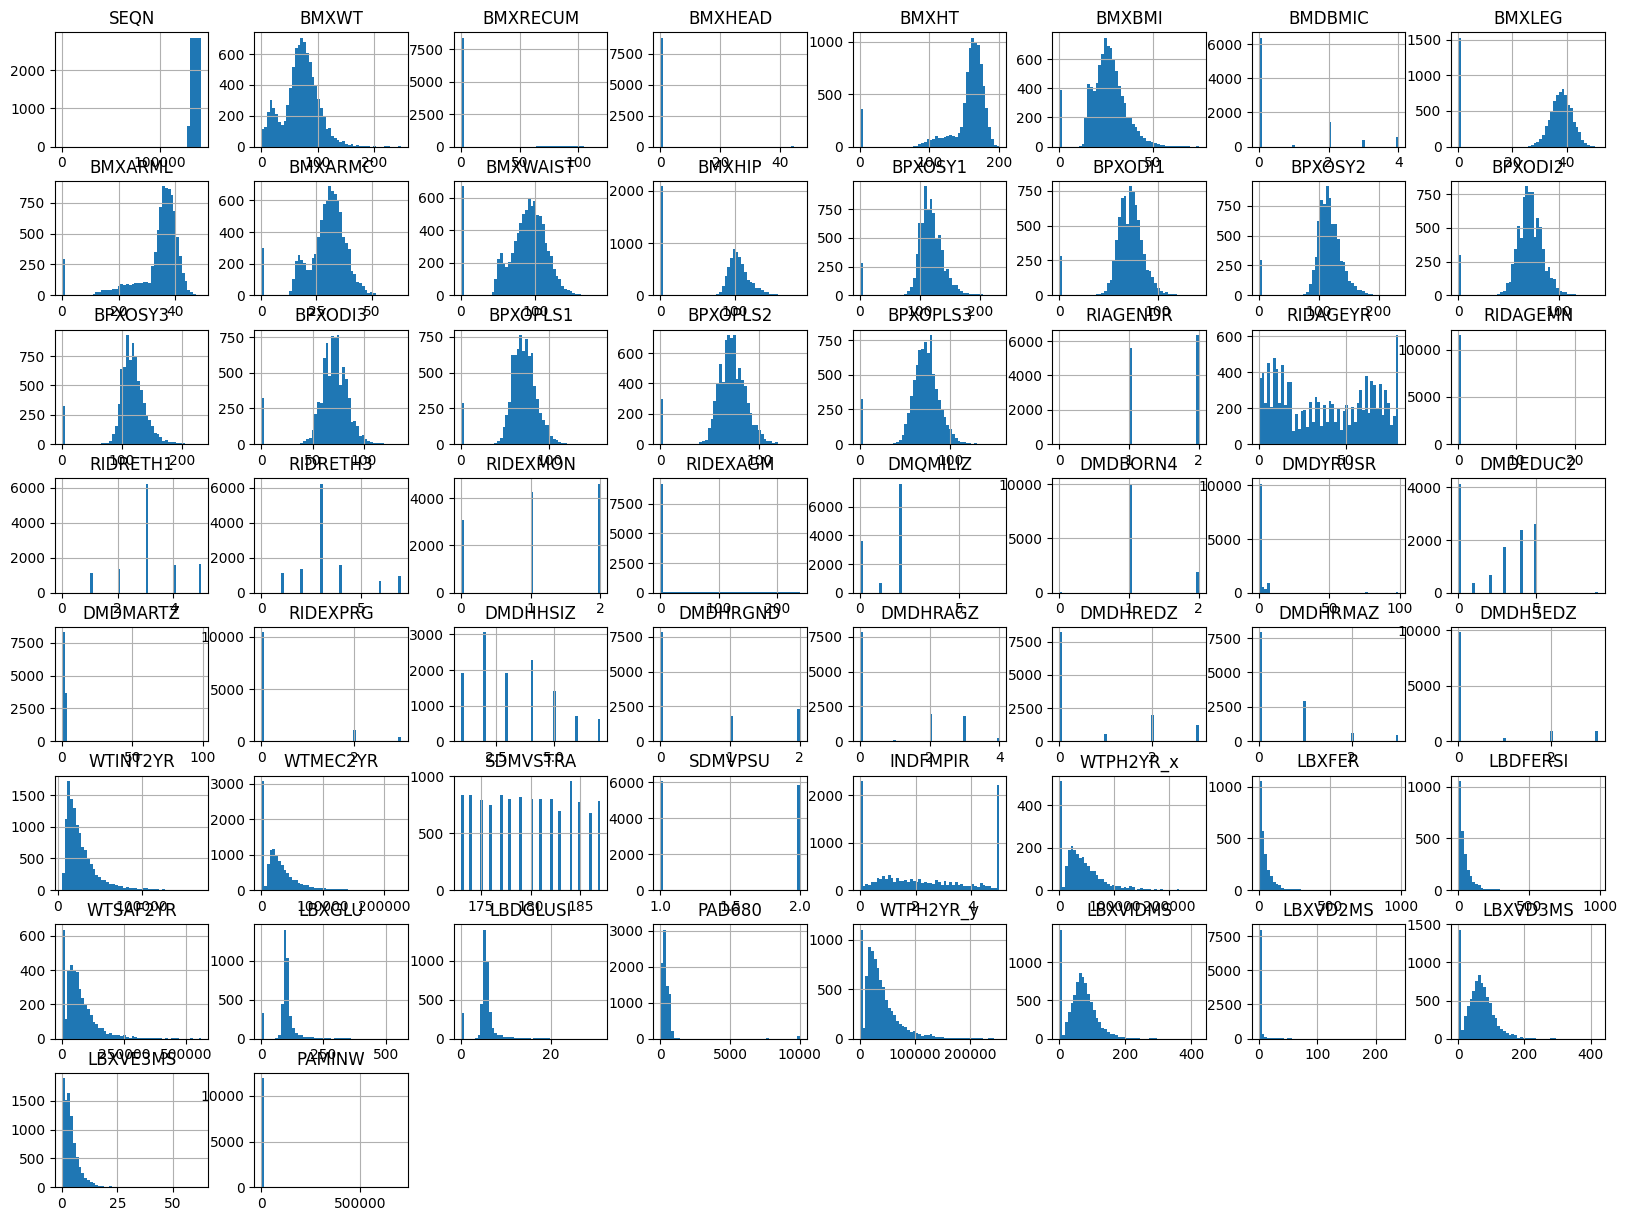

In [157]:
# features = ('BMXWT','BMXRECUM','BMXHEAD','BMXHT','BMXBMI','BMDBMIC','BMXLEG','BMXARML','BMXARMC','BMXWAIST','BMXHIP','BPXOSY1','BPXODI1','BPXOSY2','BPXODI2','BPXOSY3','BPXODI3','BPXOPLS1','BPXOPLS2','BPXOPLS3','RIAGENDR','RIDAGEYR','RIDAGEMN','RIDRETH1','RIDRETH3','RIDEXMON','RIDEXAGM','DMQMILIZ','DMDBORN4','DMDYRUSR','DMDEDUC2','DMDMARTZ','RIDEXPRG','DMDHHSIZ','DMDHRGND','DMDHRAGZ','DMDHREDZ','DMDHRMAZ','DMDHSEDZ','WTINT2YR','WTMEC2YR','SDMVSTRA','SDMVPSU','INDFMPIR','WTPH2YR_x','LBXFER','LBDFERSI','WTSAF2YR','LBXGLU','LBDGLUSI', 'PAD680', 'WTPH2YR_y','LBXVIDMS','LBXVD2MS','LBXVD3MS','LBXVE3MS','LBDVE3LC', 'PAMINW')
data.hist(bins=50, figsize=(20, 15))
plt.show()

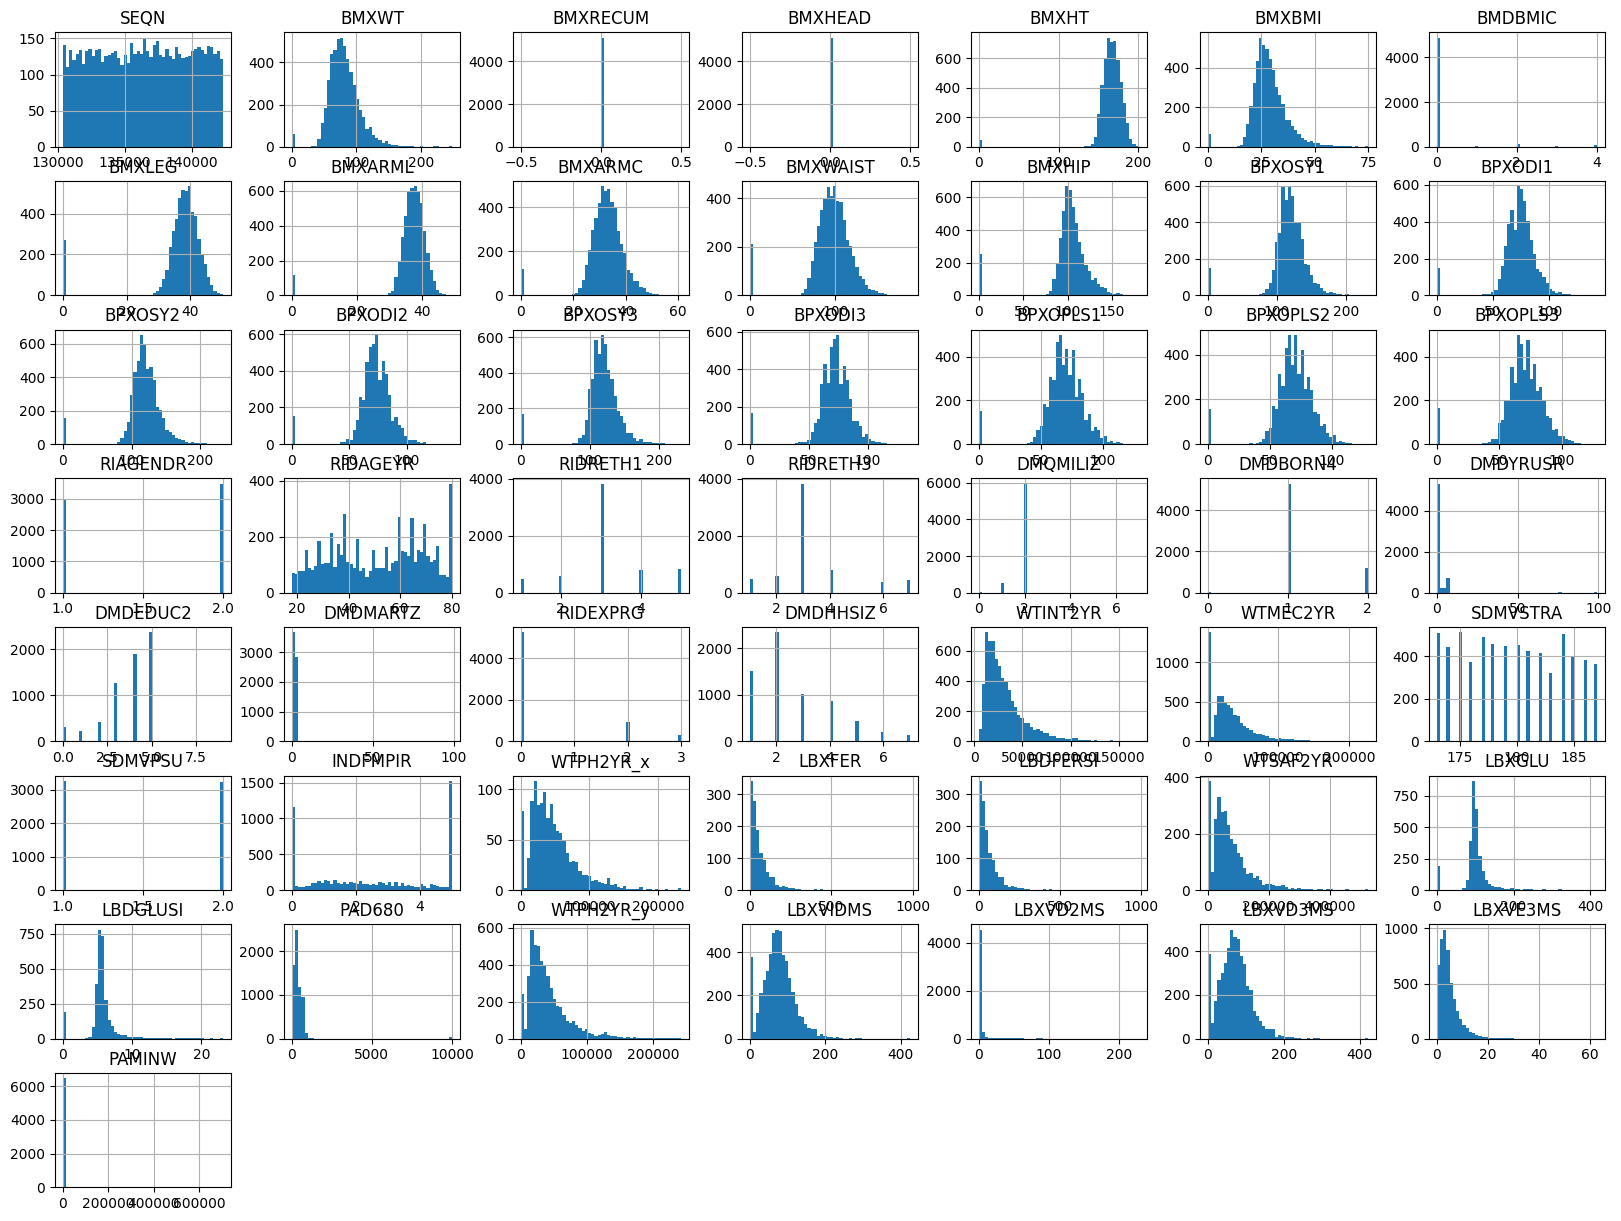

In [158]:
# combining and droping excess age working_data
working_data["RIDAGEYR"] = (working_data["RIDAGEYR"] + (working_data["RIDAGEMN"] / 24) + (working_data["RIDEXAGM"] / 12))
working_data = working_data.drop('RIDAGEMN', axis=1)
working_data = working_data.drop('RIDEXAGM', axis=1)
working_data = working_data.drop('RIDEXMON', axis=1)

# removing working_data related to household reference person
working_data = working_data.drop('DMDHRGND', axis=1)
working_data = working_data.drop('DMDHRAGZ', axis=1)
working_data = working_data.drop('DMDHREDZ', axis=1)
working_data = working_data.drop('DMDHRMAZ', axis=1)
working_data = working_data.drop('DMDHSEDZ', axis=1)

working_data.hist(bins=50, figsize=(20, 15))
plt.show()

In [159]:
corr_matrix = working_data.corr()

fig = px.imshow(corr_matrix)
fig.update_xaxes(side="top")
fig.show()

In [160]:
threshold = 0.85

upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column].abs() > threshold)]

final_data = data.drop(columns=to_drop)

corr_matrix = final_data.corr()

fig = px.imshow(corr_matrix)
fig.update_xaxes(side="top")
fig.show()

In [161]:
target = 'PAMINW'
labels = ['Meets recommendations', 'Below recommendations']

final_data = final_data.fillna(final_data.mean())
final_data = final_data.drop('SEQN', axis=1)

xf = final_data.columns
x = final_data.drop(target, axis=1)
y = final_data[target]

print(x.info())
print(y.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 41 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BMXWT     11934 non-null  float64
 1   BMXRECUM  11934 non-null  float64
 2   BMXHEAD   11934 non-null  float64
 3   BMXHT     11934 non-null  float64
 4   BMDBMIC   11934 non-null  float64
 5   BMXLEG    11934 non-null  float64
 6   BMXARML   11934 non-null  float64
 7   BMXARMC   11934 non-null  float64
 8   BMXWAIST  11934 non-null  float64
 9   BPXOSY1   11934 non-null  float64
 10  BPXODI1   11934 non-null  float64
 11  BPXOPLS1  11934 non-null  float64
 12  RIAGENDR  11934 non-null  float64
 13  RIDAGEYR  11934 non-null  float64
 14  RIDAGEMN  11934 non-null  float64
 15  RIDRETH1  11934 non-null  float64
 16  RIDEXMON  11934 non-null  float64
 17  RIDEXAGM  11934 non-null  int64  
 18  DMQMILIZ  11934 non-null  int64  
 19  DMDBORN4  11934 non-null  int64  
 20  DMDYRUSR  11934 non-null  in

In [162]:
y_encoded = (y >= 150).astype(int)
y_encoded.value_counts()

PAMINW
0    7613
1    4321
Name: count, dtype: int64

In [163]:
smote = SMOTE()
x, y = smote.fit_resample(x, y_encoded)

bal_data = pd.DataFrame(x, columns=xf)
bal_data[target] = y

print(y.value_counts())

PAMINW
1    7613
0    7613
Name: count, dtype: int64


In [164]:
Y = bal_data[target]
X = bal_data.drop([target],axis=1)
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.66, test_size=0.34, random_state=0)

# Standardize then normalize the data
scaler = StandardScaler()  

Train_X_stand = scaler.fit_transform(Train_X)
Train_X = pd.DataFrame(Train_X_stand, columns=X.columns)
Test_X_stand = scaler.fit_transform(Test_X)
Test_X = pd.DataFrame(Test_X_stand, columns=X.columns)

normalizer = Normalizer().fit(Train_X)
Train_X = normalizer.transform(Train_X)
normalizer = Normalizer().fit(Test_X)
Test_X = normalizer.transform(Test_X)

In [165]:
def roc_plot(model, Test_X, Test_Y):   
    prob = model.predict_proba(Test_X)
    ref = [0 for _ in range(len(Test_Y))]
    ref_auc = roc_auc_score(Test_Y, ref)
    lr_auc = roc_auc_score(Test_Y, prob[:, 1])


    ns_fpr, ns_tpr, _ = roc_curve(Test_Y, ref)
    lr_fpr, lr_tpr, _ = roc_curve(Test_Y, prob[:,1])

    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='AUC = {}'.format(round(roc_auc_score(Test_Y, prob[:,1]),2))) 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

In [166]:
NB_model = BernoulliNB()

NB_model = NB_model.fit(Train_X, Train_Y)

y_pred_NB = NB_model.predict(Test_X)
nb_conf = metrics.confusion_matrix(Test_Y, y_pred_NB)
print(nb_conf)

[[1533 1091]
 [ 481 2072]]


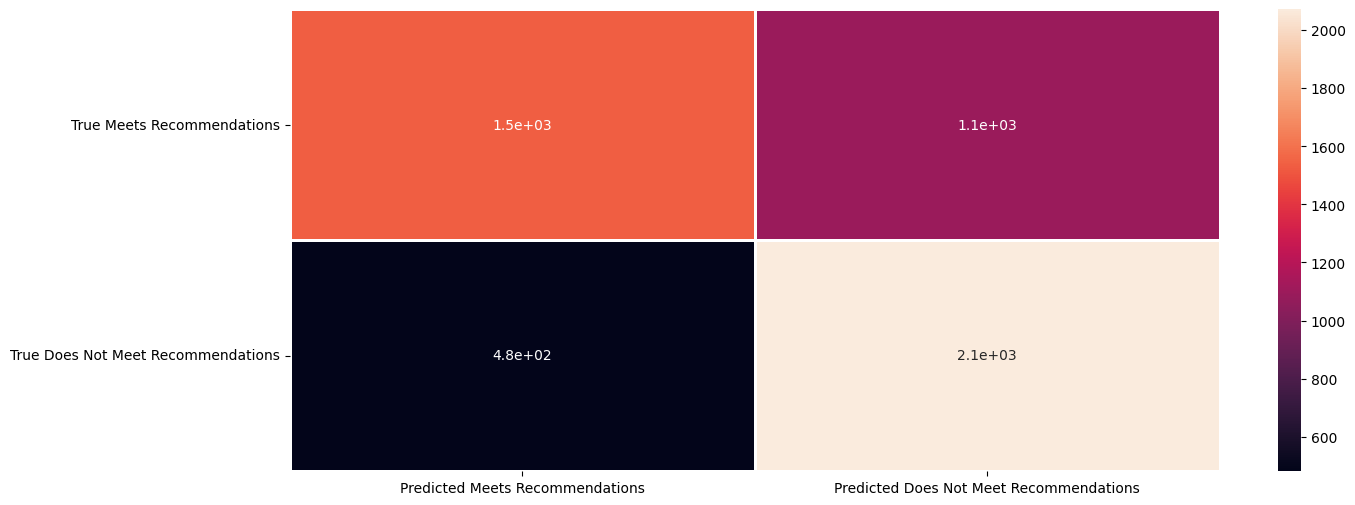

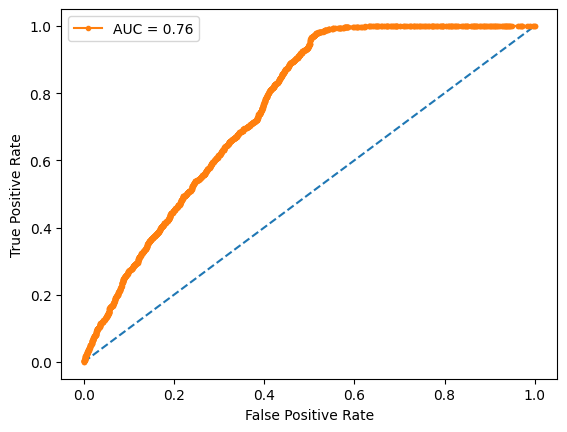

Evaluation:

 Accuracy score: 69.635%
 F1 score: 72.498%


In [167]:
ylabel = ["True Meets Recommendations","True Does Not Meet Recommendations"]
xlabel = ["Predicted Meets Recommendations","Predicted Does Not Meet Recommendations"]

f = plt.figure(figsize=(15,6))
sns.heatmap(nb_conf, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='white', linewidths=1)
plt.show()
plt.close()

NB_plot = roc_plot(NB_model, Test_X, Test_Y)

print("Evaluation:\n")
print(" Accuracy score: %2.3f" % (accuracy_score(Test_Y, y_pred_NB)*100) + "%")
print(" F1 score: %2.3f" % (f1_score(Test_Y, y_pred_NB)*100) + "%")

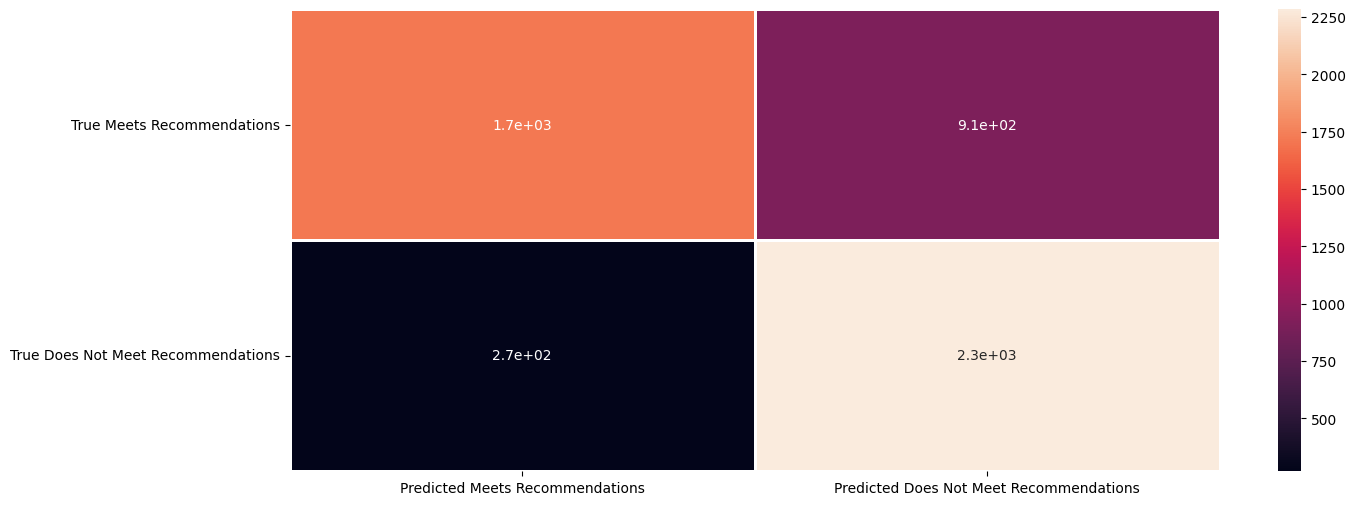

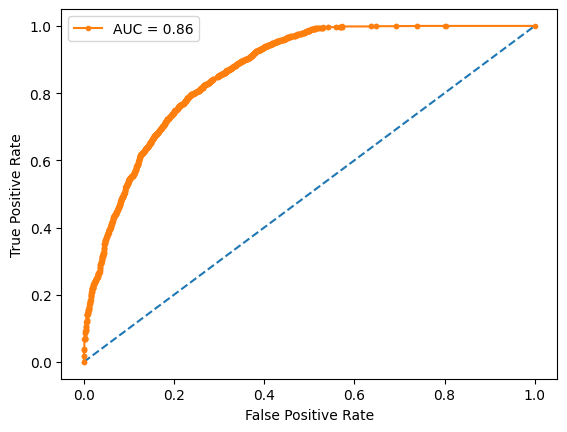

Evaluation:

 Accuracy score: 77.149%
 F1 score: 79.430%


In [168]:
svm_model = SVC(probability=True)
svm_model = svm_model.fit(Train_X, Train_Y)

y_pred_svm = svm_model.predict(Test_X)

svm_conf = metrics.confusion_matrix(Test_Y, y_pred_svm)

f = plt.figure(figsize=(15,6))
sns.heatmap(svm_conf, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='white', linewidths=1)
plt.show()
plt.close()

svm_plot = roc_plot(svm_model, Test_X, Test_Y)

print("Evaluation:\n")
print(" Accuracy score: %2.3f" % (accuracy_score(Test_Y, y_pred_svm)*100) + "%")
print(" F1 score: %2.3f" % (f1_score(Test_Y, y_pred_svm)*100) + "%")

In [169]:
RF = RandomForestClassifier()

cross_val = ms.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

param_distributions = {
        'bootstrap': [True, False],
        'max_depth': [10, 20, 50, 100, None],
        'max_features': ['sqrt', 'log2', None],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10],
        'n_estimators': [50, 100]
    }
rand_cross_val = ms.RandomizedSearchCV(RF, param_distributions, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1, error_score='raise')

RF = rand_cross_val.fit(Train_X, Train_Y).best_estimator_
y_pred_rf = RF.predict(Test_X)

RF_conf = metrics.confusion_matrix(Test_Y, y_pred_rf)
print(RF_conf)

[[1742  882]
 [ 224 2329]]


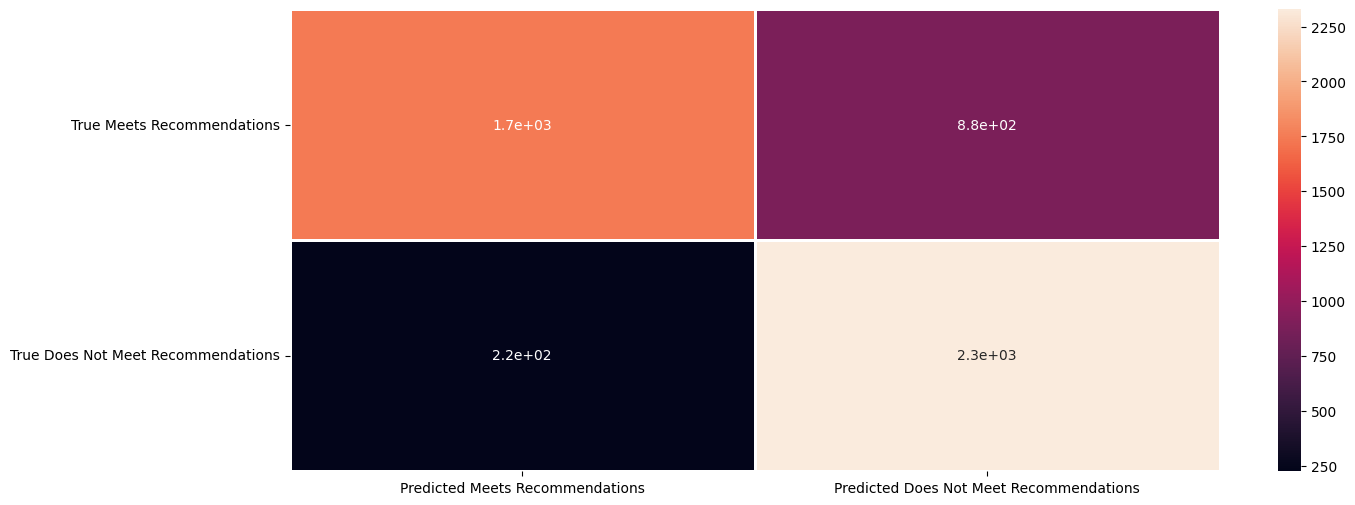

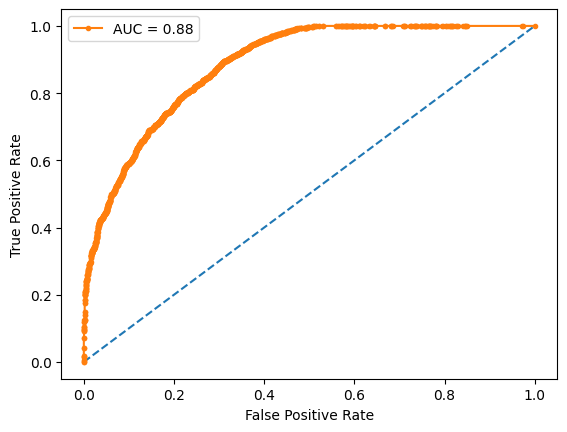

Evaluation:

 Accuracy score: 78.636%
 F1 score: 80.812%


In [170]:
f = plt.figure(figsize=(15,6))
sns.heatmap(RF_conf, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='white', linewidths=1)
plt.show()
plt.close()

RF_plot = roc_plot(RF, Test_X, Test_Y)

print("Evaluation:\n")
print(" Accuracy score: %2.3f" % (accuracy_score(Test_Y, y_pred_rf)*100) + "%")
print(" F1 score: %2.3f" % (f1_score(Test_Y, y_pred_rf)*100) + "%")

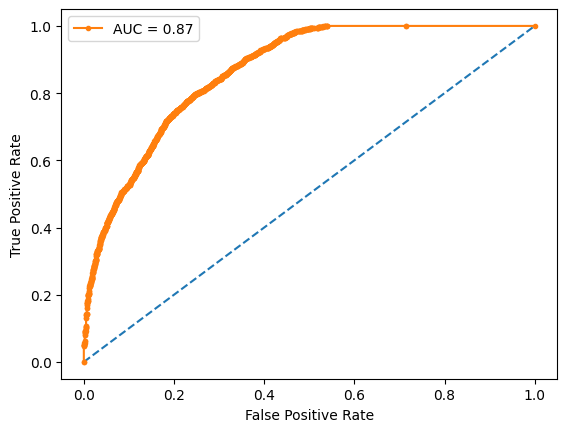

                       precision    recall  f1-score   support

Meets recommendations     0.8150    0.7085    0.7580      2624
Below recommendations     0.7358    0.8347    0.7822      2553

             accuracy                         0.7707      5177
            macro avg     0.7754    0.7716    0.7701      5177
         weighted avg     0.7760    0.7707    0.7699      5177



In [171]:
mlp = MLPClassifier(solver="adam", max_iter=5000, activation = "relu",
                    hidden_layer_sizes = (12),                      
                    alpha = 0.01,
                    batch_size = 64,
                    learning_rate_init = 0.001,
                    random_state=2)

mlp.fit(Train_X, Train_Y.values.ravel())
y_pred_mlp = mlp.predict(Test_X)

mlp_plot = roc_plot(mlp, Test_X, Test_Y)


print(classification_report(Test_Y, y_pred_mlp,
                            digits = 4,
                            target_names=labels))

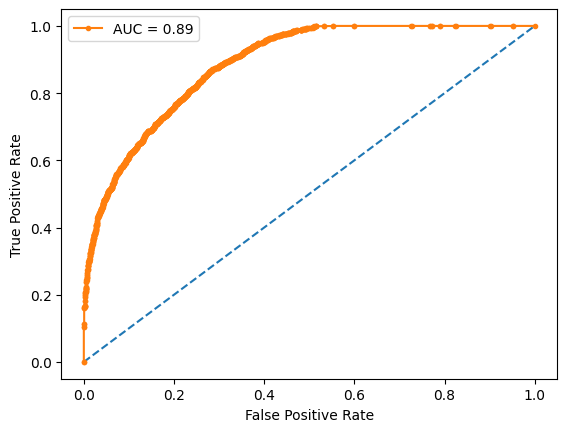

                       precision    recall  f1-score   support

Meets recommendations     0.8522    0.7077    0.7733      2624
Below recommendations     0.7442    0.8739    0.8038      2553

             accuracy                         0.7896      5177
            macro avg     0.7982    0.7908    0.7885      5177
         weighted avg     0.7989    0.7896    0.7883      5177



In [172]:
catboost_model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, verbose=0, random_state=42)
catboost_model.fit(Train_X, Train_Y)

y_pred_catboost = catboost_model.predict(Test_X)

roc_plot(catboost_model, Test_X, Test_Y)
print(classification_report(Test_Y, y_pred_catboost, digits=4, target_names=labels))